# Creation of recovered data (official)

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display

## 1. Creation of the array with the recovered values in time

In [2]:
# Reading file as dictionary
df = pd.read_excel('SouthKorea_JHU_Recovered.xlsx')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,2021-01-08 00:00:00,2021-02-08 00:00:00,2021-03-08 00:00:00,2021-04-08 00:00:00
0,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,...,167365,170494,171559,172757,174177,175674,176605,177909,179123,180719


In [3]:
# Obtaining the deaths values since the beginning
X_original = df.values[:,4:565]
X_original

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 7,
        7, 7, 9, 9, 10, 12, 12, 16, 16, 16, 18, 18, 22, 22, 22, 22, 27,
        30, 30, 30, 41, 41, 135, 135, 118, 118, 247, 288, 333, 510, 510,
        510, 1137, 1407, 1540, 1540, 1540, 1540, 2909, 2909, 3507, 3730,
        4144, 4528, 4811, 5033, 5228, 5408, 5567, 5828, 6021, 6325, 6463,
        6598, 6694, 6776, 6973, 7117, 7243, 7368, 7447, 7534, 7616, 7757,
        7829, 7937, 8042, 8114, 8213, 8277, 8501, 8635, 8717, 8764, 8854,
        8922, 9059, 9072, 9123, 9183, 9217, 9283, 9333, 9419, 9484, 9568,
        9610, 9632, 9670, 9695, 9762, 9821, 9851, 9888, 9904, 9938,
        10066, 10135, 10162, 10194, 10213, 10226, 10275, 10295, 10340,
        10363, 10398, 10405, 10422, 10446, 10467, 10499, 10506, 10531,
        10552, 10563, 10589, 10611, 10654, 10669, 10691, 10718, 10730,
        10760, 10774, 10800, 10835, 10856, 10868, 10881, 10908, 10930,
        10974, 11172, 11317, 11364, 11429, 11537, 11613, 116

In [4]:
# Transposition of the data

X_trap = np.transpose(X_original)  # Transposition of the data
X_trap.shape, X_trap[0:10], X_trap[-1]

((561, 1),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=object),
 array([180719], dtype=object))

In [5]:
# Converting data array (Total Recovered) in an unique int array

T_recovered = np.empty(len(X_trap), dtype = object)
for i in range(len(T_recovered)):
    T_recovered[i] = int(X_trap[i])
    
T_recovered.shape, T_recovered[0:20]

((561,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3],
       dtype=object))

In [6]:
# Recovered Smooth Accumulated (7 days average)

Ac_recovered_smooth = np.empty(len(T_recovered)-6, dtype = object)  # 6 first values are not available
for i in range(0, len(T_recovered)-6):
    sum_Ac = 0
    for j in range(i, i+7):
        sum_Ac = sum_Ac + T_recovered[j]
    Ac_recovered_smooth[i] = (sum_Ac/7)

Ac_recovered_smooth.shape, Ac_recovered_smooth

((555,),
 array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.14285714285714285, 0.2857142857142857, 0.7142857142857143,
        1.1428571428571428, 1.5714285714285714, 2.5714285714285716,
        3.5714285714285716, 4.428571428571429, 5.571428571428571,
        6.428571428571429, 7.428571428571429, 8.714285714285714,
        9.428571428571429, 10.714285714285714, 12.0, 13.0,
        14.285714285714286, 15.428571428571429, 16.857142857142858,
        18.285714285714285, 19.142857142857142, 20.0, 21.571428571428573,
        23.285714285714285, 25.0, 26.142857142857142, 28.857142857142858,
        31.571428571428573, 47.714285714285715, 63.142857142857146,
        75.71428571428571, 88.28571428571429, 119.28571428571429,
        154.57142857142858, 196.28571428571428, 249.85714285714286,
        303.42857142857144, 359.42857142857144, 505.0, 670.7142857142857,
        849.5714285714286, 1022.0, 1169.142857142857, 1316.2857142857142,
        1659.0, 1912.142857142857, 2212.

## 2. Creation of the final dataset

In [7]:
# Reading confirmed file as dictionary, to extract some columns
df = pd.read_csv('Confirmed_KOR.csv')
df.head()

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,KOR,Asia,South Korea,2020-01-28,4,0,0.571429,4,4,4,2.428571
1,KOR,Asia,South Korea,2020-01-29,4,0,0.428571,4,4,4,2.857143
2,KOR,Asia,South Korea,2020-01-30,4,0,0.428571,4,4,4,3.285714
3,KOR,Asia,South Korea,2020-01-31,11,7,1.285714,11,11,11,4.571429
4,KOR,Asia,South Korea,2020-02-01,12,1,1.428571,12,12,12,6.000000


In [8]:
# Arrays which will form the final dataframe of Recovered
iso_code = df.values[:, 0]
continent = df.values[:, 1]
region = df.values[:, 2]
dates = df.values[:, 3]

iso_code[0:5], continent[0:5], region[0:5], dates[0:5]

(array(['KOR', 'KOR', 'KOR', 'KOR', 'KOR'], dtype=object),
 array(['Asia', 'Asia', 'Asia', 'Asia', 'Asia'], dtype=object),
 array(['South Korea', 'South Korea', 'South Korea', 'South Korea',
        'South Korea'], dtype=object),
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object))

In [9]:
# Array concatenation for building the final dataframe

columns = 6  # Number of columns
X_total = np.empty((len(Ac_recovered_smooth), columns), dtype = object)

for i in range(len(Ac_recovered_smooth)):
    X_total[i] = [iso_code[i], continent[i], region[i], dates[i],
                  T_recovered[i+6], Ac_recovered_smooth[i]]
    
X_total.shape, X_total[0:10]

((555, 6),
 array([['KOR', 'Asia', 'South Korea', '2020-01-28', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-29', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-30', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-01-31', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-01', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-02', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-03', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-04', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-05', 0, 0.0],
        ['KOR', 'Asia', 'South Korea', '2020-02-06', 0, 0.0]], dtype=object))

In [10]:
# Labels of each column of the dataframe
labels = ['ISO_code', 'Continent', 'Country/Region', 'Date',
          'Total Recovered', 'Total Recovered Smooth (7 days)']

In [11]:
# Creation of the final dataframe
df_recovered = pd.DataFrame(data=X_total, columns=labels)
df_recovered

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,KOR,Asia,South Korea,2020-01-28,0,0.0
1,KOR,Asia,South Korea,2020-01-29,0,0.0
2,KOR,Asia,South Korea,2020-01-30,0,0.0
3,KOR,Asia,South Korea,2020-01-31,0,0.0
4,KOR,Asia,South Korea,2020-02-01,0,0.0
...,...,...,...,...,...,...
550,KOR,Asia,South Korea,2021-07-31,175674,171341.571429
551,KOR,Asia,South Korea,2021-08-01,176605,172661.571429
552,KOR,Asia,South Korea,2021-08-02,177909,174167.857143
553,KOR,Asia,South Korea,2021-08-03,179123,175400.571429


In [12]:
# Export dataframe to a csv file

from pathlib import Path  
filepath = Path('Recovered_KOR_OF.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_recovered.to_csv(filepath, index=False)

Text(0.5, 1.0, 'Recovered Official')

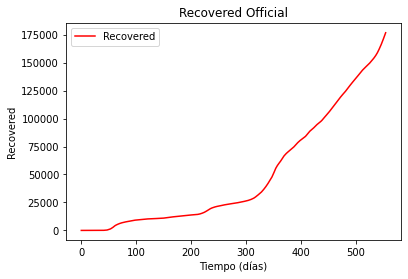

In [13]:
plt.plot(range(0, len(Ac_recovered_smooth)), Ac_recovered_smooth, 'r', label="Recovered")
plt.xlabel("Tiempo (días)")
plt.ylabel("Recovered")
plt.legend()

plt.title("Recovered Official")